In [18]:
import pandas as pd
import numpy as np

### Read .csv File

In [19]:
df = pd.read_csv('marina_sheet.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [20]:
df = df.set_index('State')
df = df.sort_index()
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,0.00,116983.80,45173.06,14681.40
California,23640.93,96189.63,148001.11,71498.49
California,28754.33,118546.05,172795.67,78239.91
California,46426.07,157693.92,210797.67,96712.80
California,78013.11,121597.55,264346.06,126992.93


# 1. The Max State Pay on R&D with relate to its Profit


### Grouping data accord to State

In [21]:
for group, frame in df.groupby('State'):
    avg = np.average(frame['R&D Spend'])
    avg_profit = np.average(frame['Profit'])

    print('Counties in state ' + group + ' have an average R&D Spend of ' + str(avg)+ ' with Profit ' +str(avg_profit))

Counties in state California have an average R&D Spend of 64657.6741176 with Profit 103905.175294
Counties in state Florida have an average R&D Spend of 80724.01625 with Profit 118774.024375
Counties in state New York have an average R&D Spend of 76195.0623529 with Profit 113756.446471


###  Get the Average R&D and Average Profit

In [22]:
df_State=(df.groupby('State')['R&D Spend','Profit']
    .agg({'R&D Spend': np.average, 'Profit': np.average}))
df_State['precentage']=df_State.apply(lambda x: np.divide(x['R&D Spend'],x['Profit']), axis=1)
df_State

,R&D Spend,Profit,precentage
State,,,
California,64657.674118,103905.175294,0.622276
Florida,80724.016250,118774.024375,0.679644
New York,76195.062353,113756.446471,0.669809


###  Get the State of maximum precentage

In [23]:
df_State['precentage'].argmax()
    

'Florida'

# 2.The Max State Pay on Marketing with relate to its Profit

In [24]:
df_State2=(df.groupby('State')['Marketing Spend','Profit']
    .agg({'Marketing Spend': np.average, 'Profit': np.average}))
df_State2['precentage']=df_State2.apply(lambda x: np.divide(x['Marketing Spend'],x['Profit']), axis=1)
df_State2

,Marketing Spend,Profit,precentage
State,,,
California,182540.929412,103905.175294,1.756803
Florida,247323.551250,118774.024375,2.082303
New York,205346.015882,113756.446471,1.805137


In [25]:
df_State2['precentage'].argmax()

'Florida'

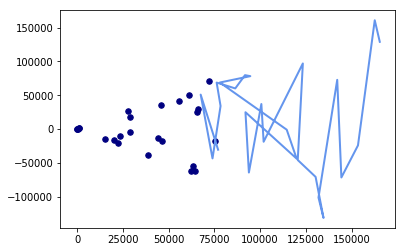

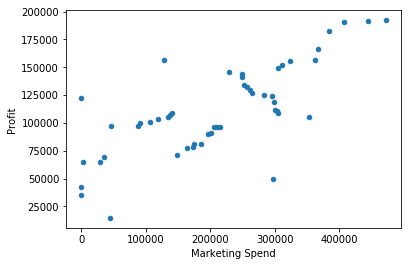

In [26]:
import matplotlib.pyplot as plt
df.plot(kind='scatter',x='Marketing Spend',y='Profit')
plt.show()

weak correlation between Marketing and Profit

# 3.Relation R&D and Profit

## Scatter plot

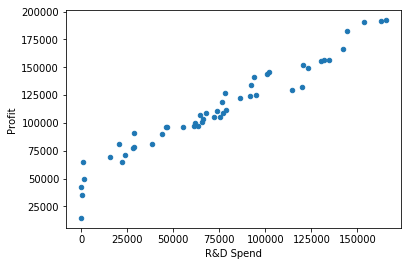

In [27]:
import matplotlib.pyplot as plt
df.plot(kind='scatter',x='R&D Spend',y='Profit')
plt.show()

From graph it seems to be positive correlatted

## a.Linear Model

### Import libraries and dataset 

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('marina_sheet.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Divide Dataset to train and test data

In [50]:
RandD =df['R&D Spend'].values 

# make array of n*1 
arr=RandD.transpose()
RandD  = np.array([arr]).T

index=int(len(df['R&D Spend'])/2)

RandD_train = RandD[0:index]
RandD_test = RandD[index:]

ProfitData=df['Profit'].values

# make array of n*1 
arr=ProfitData.transpose()
ProfitData  = np.array([arr]).T

Profit_train = ProfitData[0:index]
Profit_test = ProfitData[index:]


### Get the best linear regression 

Coefficients: 
 [[ 0.84339449]]
Mean squared error: 104468490.14
Variance score: 0.82


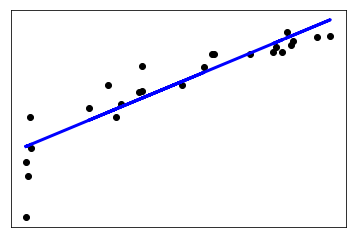

In [51]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(RandD_train, Profit_train )

# Make predictions using the testing set
Profit_pred = regr.predict(RandD_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Profit_test, Profit_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Profit_test, Profit_pred))

# Plot outputs
plt.scatter(RandD_test, Profit_test,  color='black')
plt.plot(RandD_test, Profit_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## b. Polynomial Model

### b.1. Degree 2 =aX^2+bX+c

In [ ]:
RandD =df['R&D Spend'].values 
ProfitData=df['Profit'].values

Polynomial_coff_2= np.polyfit(RandD, ProfitData, 2)
Polynomial_coff_2

In [ ]:
p2=np.poly1d(Polynomial_coff_2)
Profit_pred2=p2(RandD)
plt.scatter(RandD, ProfitData,  color='black')
plt.plot(RandD, Profit_pred2, color='blue', linewidth=3)
plt.show()

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(ProfitData, Profit_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ProfitData, Profit_pred2))


### b.2. Degree 3 =aX^3+bX^2+cX+d


In [ ]:
Polynomial_coff_3= np.polyfit(RandD, ProfitData, 3)
p3=np.poly1d(Polynomial_coff_3)
Profit_pred3=p3(RandD)
plt.scatter(RandD, ProfitData,  color='black')
plt.plot(RandD, Profit_pred3, color='blue', linewidth=3)
plt.show()

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(ProfitData, Profit_pred3))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ProfitData, Profit_pred3))


### b.3. Degree 4 =aX^4+bX^3+cX^2+dX+e


In [ ]:
Polynomial_coff_4= np.polyfit(RandD, ProfitData, 4)
p4=np.poly1d(Polynomial_coff_4)
Profit_pred4=p4(RandD)
plt.scatter(RandD, ProfitData,  color='black')
plt.plot(RandD, Profit_pred4, color='blue', linewidth=3)
plt.show()

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(ProfitData, Profit_pred4))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ProfitData, Profit_pred4))

As the order of polynomial increase the RMSE decrease

In [ ]:
Polynomial_coff_30= np.polyfit(RandD, ProfitData, 30)
p30=np.poly1d(Polynomial_coff_30)
Profit_pred30=p30(RandD)
plt.scatter(RandD, ProfitData,  color='black')
plt.plot(RandD, Profit_pred30, color='blue', linewidth=3)
plt.show()

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(ProfitData, Profit_pred30))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ProfitData, Profit_pred30))

In [ ]:
LinearModel = pd.Series({
                        'Mean squared error': mean_squared_error(Profit_test, Profit_pred),
                        'Variance score': r2_score(Profit_test, Profit_pred)})
Polynomial_2 = pd.Series({
                        'Mean squared error': mean_squared_error(ProfitData, Profit_pred2),
                        'Variance score':r2_score(ProfitData, Profit_pred2)})
Polynomial_3 = pd.Series({
                        'Mean squared error': mean_squared_error(ProfitData, Profit_pred3),
                        'Variance score':r2_score(ProfitData, Profit_pred3)})
Polynomial_4 = pd.Series({
                        'Mean squared error': mean_squared_error(ProfitData, Profit_pred4),
                        'Variance score': r2_score(ProfitData, Profit_pred4)})
Polynomial_30 = pd.Series({
                        'Mean squared error': mean_squared_error(ProfitData, Profit_pred30),
                        'Variance score':r2_score(ProfitData, Profit_pred30)})

dfModels = pd.DataFrame([LinearModel, Polynomial_2,Polynomial_3,Polynomial_4,Polynomial_30],index=['LinearModel', 'Polynomial_2','Polynomial_3','Polynomial_4','Polynomial_30'])
dfModels.head()

Mean squared error: 2092246943.72
Variance score: -2.67
Mean squared error: 206799480800.47
Variance score: -361.63
Mean squared error: 2633247861743.65
Variance score: -4616.55


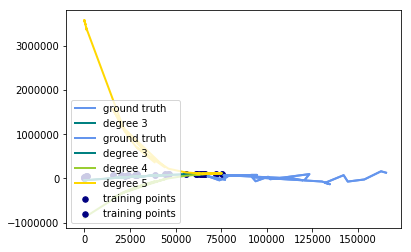

In [54]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

y = f(RandD_train)
plt.plot(RandD_train, y, color='cornflowerblue', linewidth=lw,
         label="ground truth")


colors = ['teal', 'yellowgreen', 'gold']


plt.scatter(RandD_test, Profit_test, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(RandD_train, Profit_train )
    Profit_pred = model.predict(RandD_test)
    plt.plot(RandD_test, Profit_pred, color=colors[count], linewidth=2,
             label="degree %d" % degree)

    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(Profit_test, Profit_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(Profit_test, Profit_pred))


plt.legend(loc='lower left')
plt.show()

plt.show()

# 4. Whatif we pay on R&D more than Adminstration 

In [ ]:
from sklearn import preprocessing

data = pd.read_csv('marina_sheet.csv')

# Normalise profit for ploting
normalized_ProfitData=((data['Profit']-data['Profit'].min())/(data['Profit'].max()-data['Profit'].min())).values

data['Profit']=normalized_ProfitData

# split Data for R&D more than Ads.
More_RandD=data[data['R&D Spend']>data['Administration']]

In [ ]:
# split Data for R&D less than Ads.
Less_RandD=data[data['R&D Spend']<data['Administration']]

### Ploting Data

In [ ]:
X_axis=np.linspace(0.0, 1.0, num=8)
X_axis2=np.linspace(0.0, 1.0, num=42)

plt.scatter(X_axis, More_RandD['Profit'].values,  color='black')
plt.scatter(X_axis2, Less_RandD['Profit'].values,  color='blue')
plt.show()

From figure it show that as payment on the R&D increasing the Profit increase